In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)
import warnings
warnings.filterwarnings('ignore')

# importing dataset 

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [5]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

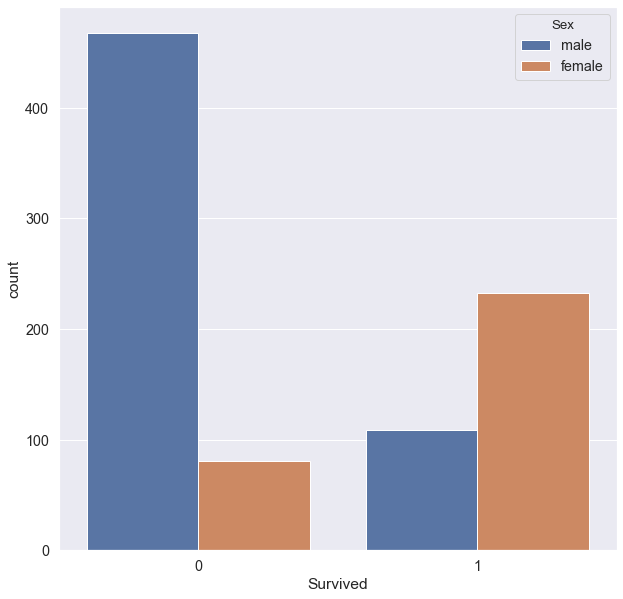

In [7]:
sns.countplot(train['Survived'],hue=train['Sex'])

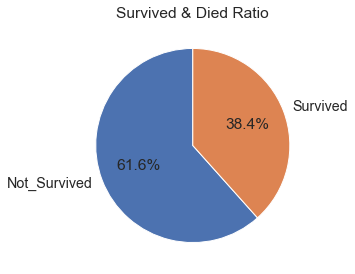

In [8]:
plt.figure(figsize=(20,5))
# Pie chart
plt.subplot(142)
train['Survived'].value_counts().plot.pie(
    autopct='%1.1f%%',startangle=90, 
    labels=['Not_Survived','Survived']);
plt.ylabel('');
plt.title('Survived & Died Ratio');

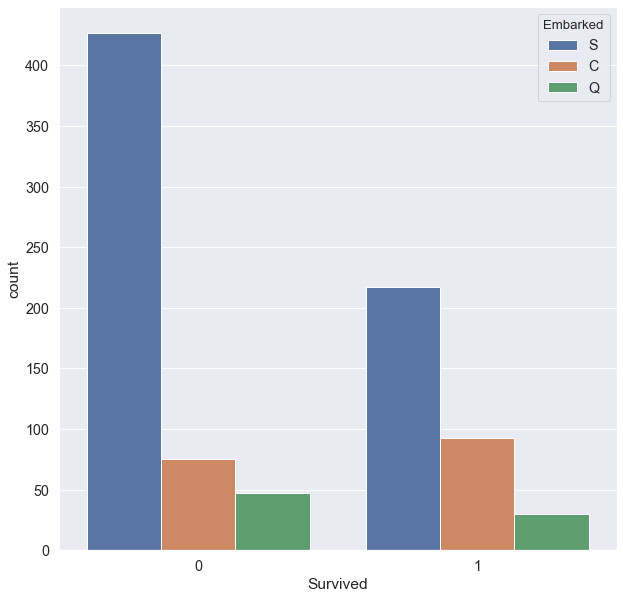

In [9]:
sns.countplot(train['Survived'],hue=train['Embarked'])

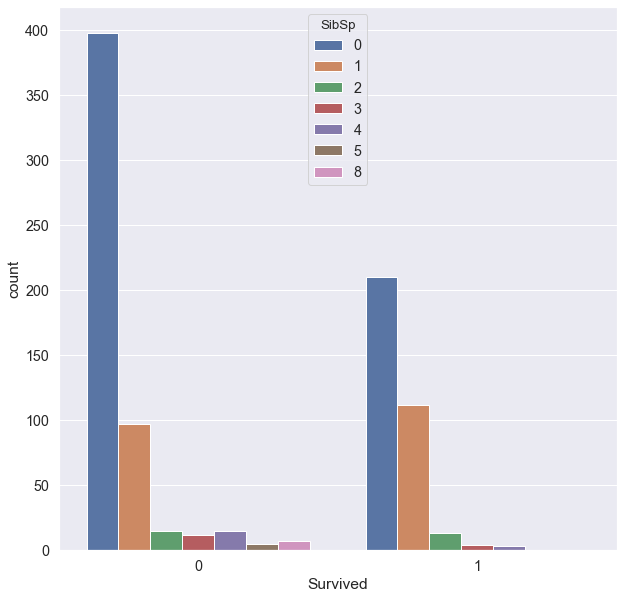

In [10]:
sns.countplot(train['Survived'],hue=train['SibSp'])

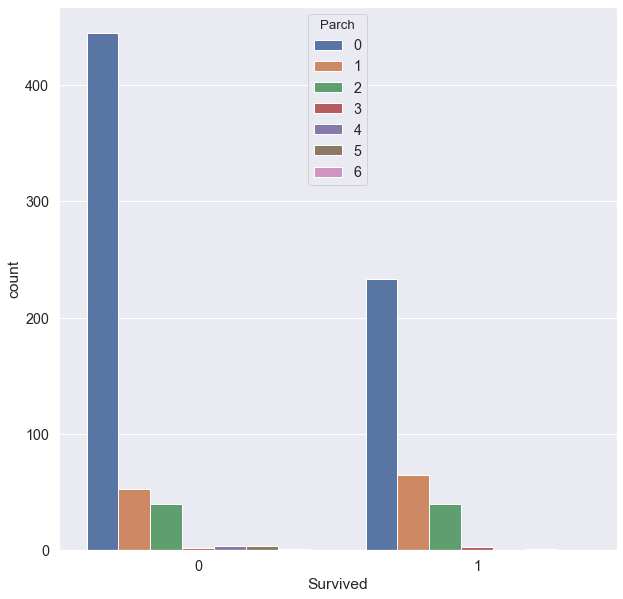

In [11]:
sns.countplot(train['Survived'],hue=train['Parch'])

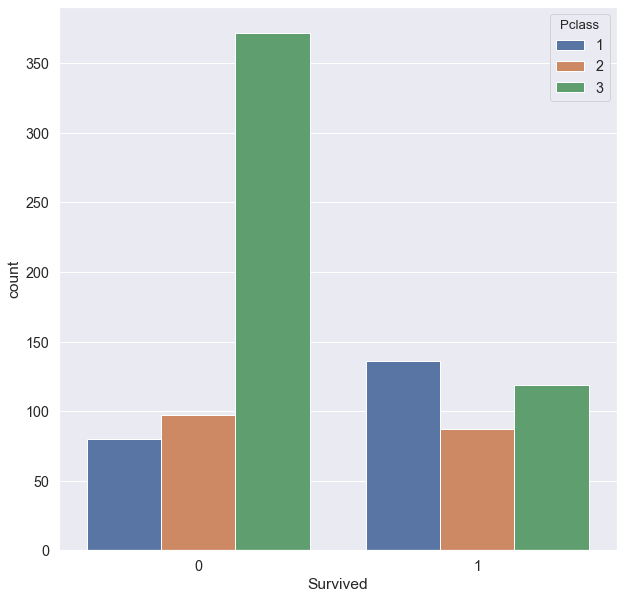

In [12]:
sns.countplot(train['Survived'],hue=train['Pclass'])

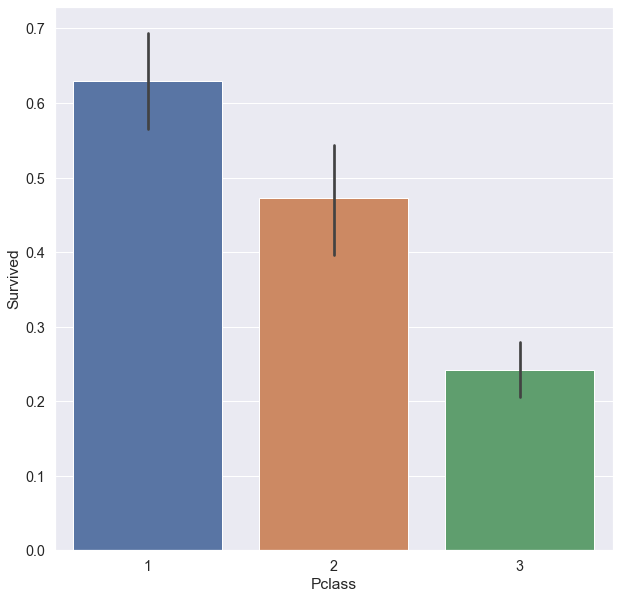

In [13]:
sns.barplot(y='Survived',x="Pclass",data=train)

In [14]:
#look at survival rate by age and class
age = pd.cut(train['Age'],[0,18,80])
train.pivot_table('Survived',['Sex',age],'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

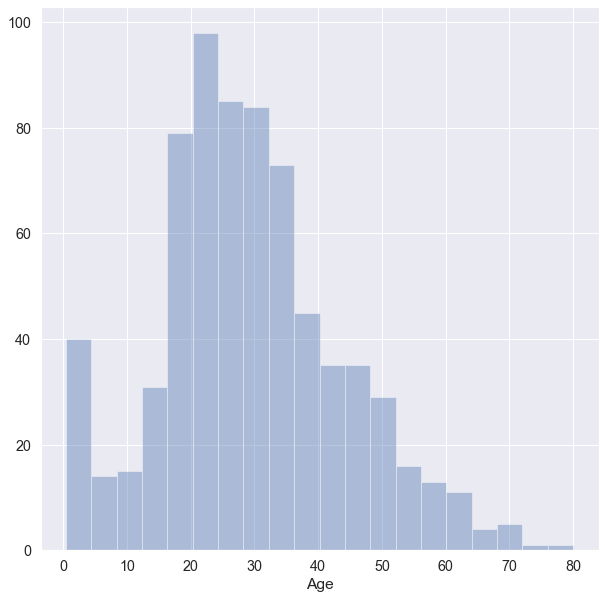

In [15]:
sns.distplot(train['Age'],kde=False)

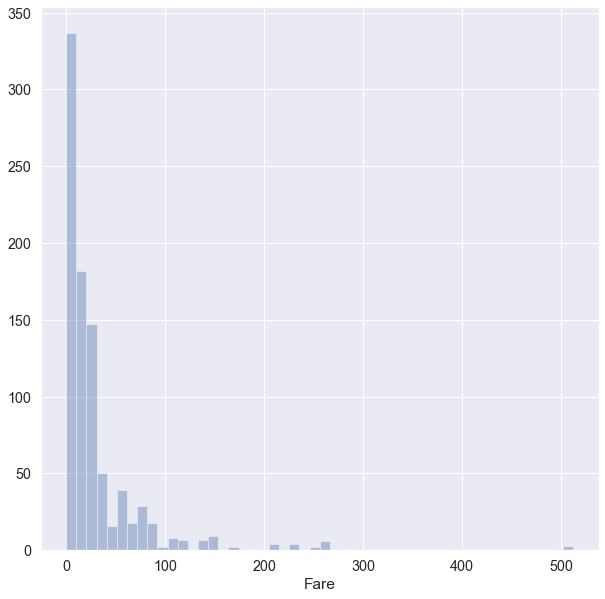

In [16]:
sns.distplot(train['Fare'],kde=False)

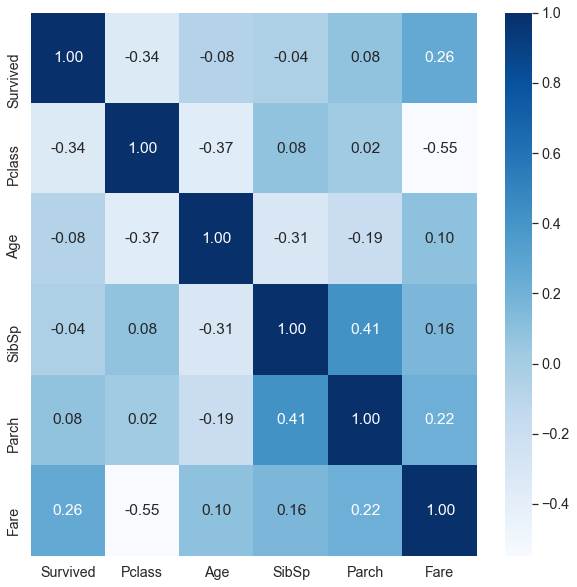

In [17]:
sns.heatmap(train.corr(),cmap = 'Blues', fmt='.2f', annot=True)

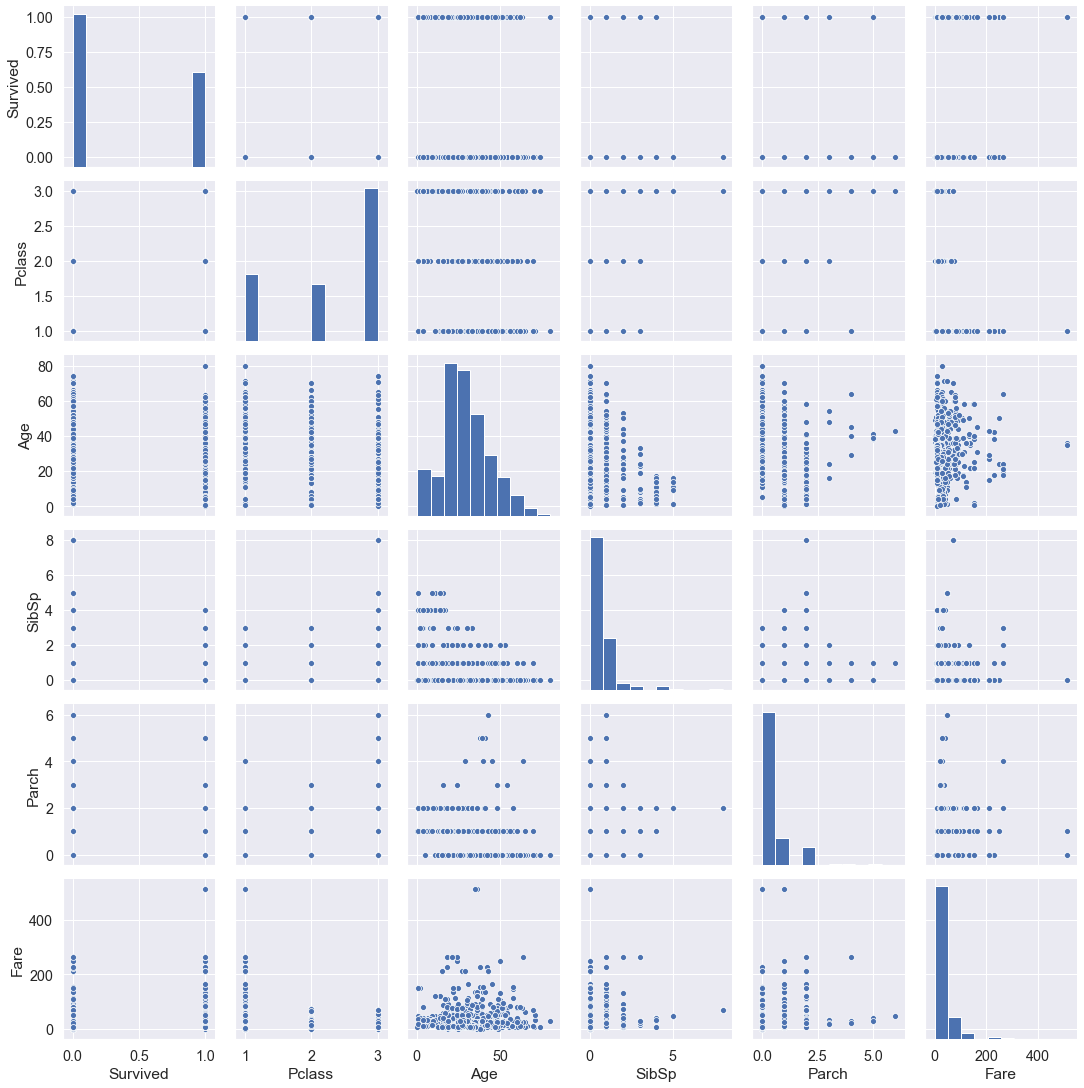

In [18]:
sns.pairplot(train)

In [19]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [20]:
train['Age'].fillna(train['Age'].mean(),inplace=True)

In [21]:
train.dropna(axis=0,inplace=True)

In [22]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [23]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [24]:
x= train.iloc[:,1:]
y=train.iloc[:,:1]

In [25]:
x=pd.get_dummies(x,columns=['Sex','Embarked'],drop_first=True)

In [26]:
x

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,1,0,1
1,1,38.000000,1,0,71.2833,0,0,0
2,3,26.000000,0,0,7.9250,0,0,1
3,1,35.000000,1,0,53.1000,0,0,1
4,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,1,0,1
887,1,19.000000,0,0,30.0000,0,0,1
888,3,29.699118,1,2,23.4500,0,0,1
889,1,26.000000,0,0,30.0000,1,0,0


# try logistic regression

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test , y_train,y_test=train_test_split(x,y,test_size= 0.2 ,random_state=0)

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler= StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
log_model = LogisticRegression()

In [33]:
log_model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
y_pred=log_model.predict(x_test)

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [36]:
confusion_matrix(y_test,y_pred)

array([[84, 21],
       [30, 43]], dtype=int64)

In [37]:
accuracy_score(y_test,y_pred)

0.7134831460674157

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       105
           1       0.67      0.59      0.63        73

    accuracy                           0.71       178
   macro avg       0.70      0.69      0.70       178
weighted avg       0.71      0.71      0.71       178



# Applying k-Fold Cross Validation

In [38]:
from sklearn.model_selection import cross_val_score

In [40]:
accuracies = cross_val_score(estimator=log_model,X=x_train,y=y_train,cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 81.99 %
Standard Deviation: 5.43 %


# Try knn 

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train)
y_pred=knn_model.predict(x_test)

In [43]:
confusion_matrix(y_test,y_pred)

array([[86, 19],
       [31, 42]], dtype=int64)

In [44]:
accuracy_score(y_test,y_pred)

0.7191011235955056

# Applying k-Fold Cross Validation

In [45]:
accuracies = cross_val_score(estimator=knn_model,X=x_train,y=y_train,cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 82.69 %
Standard Deviation: 5.14 %


# Applying Grid Search to find the best model and the best parameters

In [46]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_neighbors': [5,6,7,8,9,10]},
              ]
grid_search = GridSearchCV(estimator = knn_model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 83.26 %
Best Parameters: {'n_neighbors': 6}


# Try SVM

In [27]:
from sklearn.svm import SVC

In [32]:
svm_model = SVC()
svm_model.fit(x_train,y_train)
y_pred =svm_model.predict(x_test)

In [35]:
confusion_matrix(y_test,y_pred)

array([[92, 13],
       [29, 44]], dtype=int64)

In [36]:
accuracy_score(y_test,y_pred)

0.7640449438202247

# Applying k-Fold Cross Validation

In [39]:
accuracies =cross_val_score(estimator=svm_model,X=x_train,y=y_train,cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 84.80 %
Standard Deviation: 3.73 %


# Applying Grid Search to find the best model and the best parameters

In [40]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = svm_model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 84.95 %
Best Parameters: {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}


# try naive bayes

In [53]:
from sklearn.naive_bayes import GaussianNB
gaussin_model = GaussianNB()
gaussin_model.fit(x_train,y_train)
y_pred=gaussin_model.predict(x_test)

In [54]:
confusion_matrix(y_test,y_pred)

array([[81, 24],
       [28, 45]], dtype=int64)

In [55]:
accuracy_score(y_test,y_pred)

0.7078651685393258

# Applying k-Fold Cross Validation

In [56]:
accuracies =cross_val_score(estimator=gaussin_model,X=x_train,y=y_train,cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 81.15 %
Standard Deviation: 5.80 %


# try descion tree

In [57]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion = 'entropy')
tree_model.fit(x_train,y_train)
y_pred = tree_model.predict(x_test)

In [58]:
confusion_matrix(y_test,y_pred)

array([[87, 18],
       [26, 47]], dtype=int64)

In [59]:
accuracy_score(y_test , y_pred)

0.7528089887640449

# Applying k-Fold Cross Validation

In [60]:
accuracies =cross_val_score(estimator=tree_model,X=x_train,y=y_train,cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 80.31 %
Standard Deviation: 6.29 %


# Try random forest

In [61]:
from sklearn.ensemble import  RandomForestClassifier
forest_model = RandomForestClassifier(n_estimators=10)
forest_model.fit(x_train,y_train)
y_pred = forest_model.predict(x_test)

In [62]:
confusion_matrix(y_test,y_pred)

array([[91, 14],
       [32, 41]], dtype=int64)

In [63]:
accuracy_score(y_test,y_pred)

0.7415730337078652

# Applying k-Fold Cross Validation

In [64]:
accuracies =cross_val_score(estimator=forest_model,X=x_train,y=y_train,cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 82.55 %
Standard Deviation: 4.30 %


# Applying Grid Search to find the best model and the best parameters

In [65]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [10,12,14,16,18,20,22]}]
grid_search = GridSearchCV(estimator = forest_model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 82.41 %
Best Parameters: {'n_estimators': 20}


# try XGboost

In [66]:
from xgboost import XGBClassifier
xg_model = XGBClassifier()
xg_model.fit(x_train, y_train)
y_pred=xg_model.predict(x_test)

In [67]:
confusion_matrix(y_test,y_pred)


array([[88, 17],
       [29, 44]], dtype=int64)

In [68]:
accuracy_score(y_test,y_pred)

0.7415730337078652

# Applying k-Fold Cross Validation

In [69]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = xg_model, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 83.82 %
Standard Deviation: 4.86 %


# SVM performed the best with accuracy = 84,95%